 
# <div style="text-align: center; background-color:turquoise; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Amnesia Prediction</div> 

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">A. About dataset</div>



This dataset is curated to facilitate the development of machine learning models aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images. Each row in the dataset corresponds to an individual case with various features

Columns:
1. Number<br>
Type: Integer<br>
Description:<br>
A unique identifier for each individual case.<br>
2. Sex<br>
Type: Categorical (Male, Female)<br>
Description: The sex of the individual.<br>
3. %Red Pixel<br>
Type: Float<br>
Description: The percentage of red pixels in the image associated with the case.<br>
4. %Green Pixel<br>
Type: Float<br>
Description: The percentage of green pixels in the image associated with the case.<br>
5. %Blue Pixel<br>
Type: Float<br>
Description: The percentage of blue pixels in the image associated with the case.<br>
6. Hb<br>
Type: Float<br>
Description: Hemoglobin level of the individual, measured in grams per deciliter (g/dL).<br>
7. Anaemic<br>
Type:Catagorical (Yes | No )<br>
Description: An indicator of anaemia status (1 for anaemic, 0 for not anaemic).


Import Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Loading dataset

In [5]:
df=pd.read_csv("amnesia_data.csv")
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [7]:
df=df.drop("Number",axis=1)
df.head(2)

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No


In [8]:
df.rename(columns = {'%Red Pixel':'Red_pixel',
                      '%Green pixel': 'Green_pixel',
                      '%Blue pixel': 'Blue_pixel'}, inplace = True)
df.head()

,Sex,Red_pixel,Green_pixel,Blue_pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No


In [9]:
# Features and target variable
X = df.drop([ 'Anaemic'], axis=1)
y = df['Anaemic']


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">B. EDA

In [10]:
# Descriptive Statistics
stats = df.describe()

stats

,Red_pixel,Green_pixel,Blue_pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


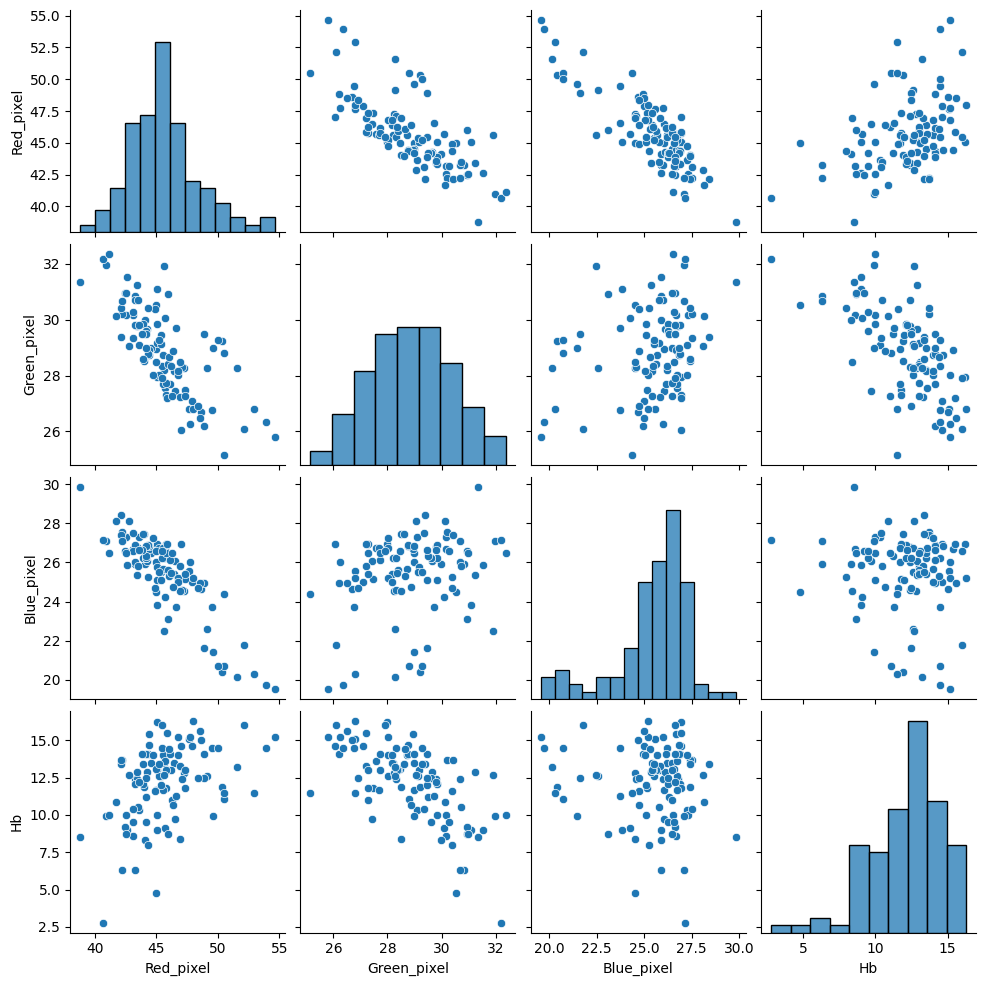

In [11]:
sns.pairplot(df)

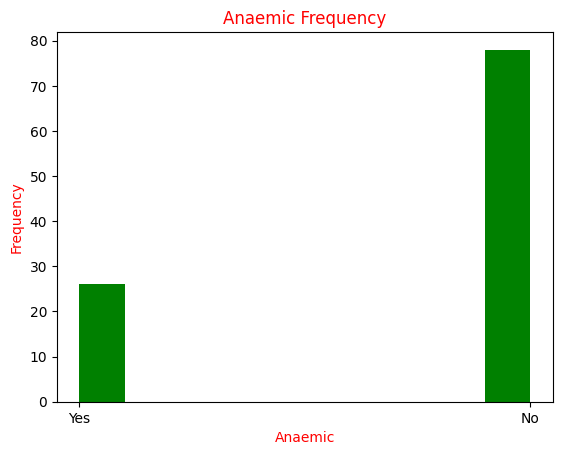

In [12]:
plt.hist(df['Anaemic'], color="green")
plt.title('Anaemic Frequency',color="red")
plt.xlabel('Anaemic',color="red")
plt.ylabel('Frequency',color="red")
plt.show()

In [13]:
df['Sex'].unique()

array(['M', 'F', 'F ', 'M '], dtype=object)

In [14]:
df['Sex'] = df['Sex'].str.strip()
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [15]:
df['Anaemic'] = df.Anaemic.astype('category')
df['Anaemic'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

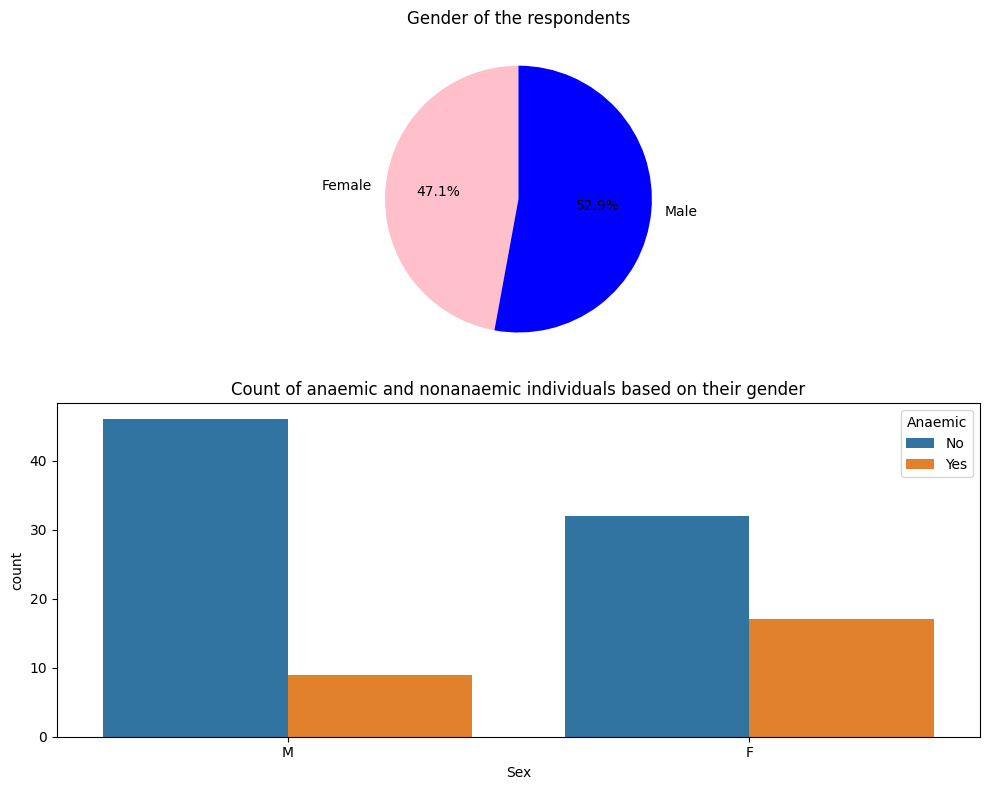

In [16]:
female = df[df['Sex'] == 'F'].shape[0]
male = df[df['Sex'] == 'M'].shape[0]

plt.figure(figsize = (10,8))

plt.subplot(2,1,1)
plt.title('Gender of the respondents')
plt.pie([female, male],
        labels = ['Female', 'Male'],
        autopct = '%1.1f%%',
        startangle = 90,
        colors = ['pink', 'blue']
       )

plt.subplot(2,1,2)
plt.title('Count of anaemic and nonanaemic individuals based on their gender')
sns.countplot(data= df,x='Sex' , hue = 'Anaemic')

plt.tight_layout()
plt.show()

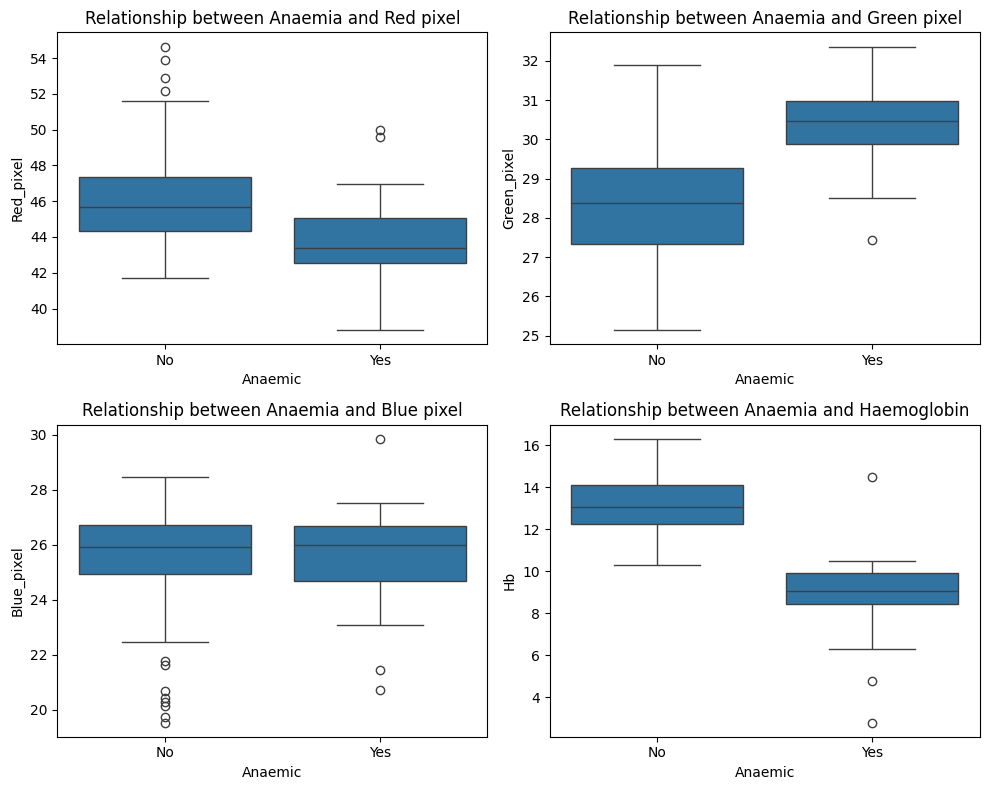

In [17]:
plt.figure(figsize = (10, 8))

plt.subplot(2,2,1)
plt.title('Relationship between Anaemia and Red pixel')
sns.boxplot(data = df, y = 'Red_pixel', x = 'Anaemic')

plt.subplot(2,2,2)
plt.title('Relationship between Anaemia and Green pixel')
sns.boxplot(data = df, y = 'Green_pixel', x = 'Anaemic')

plt.subplot(2,2,3)
plt.title('Relationship between Anaemia and Blue pixel')
sns.boxplot(data = df, y = 'Blue_pixel', x = 'Anaemic')

plt.subplot(2,2,4)
plt.title('Relationship between Anaemia and Haemoglobin')
sns.boxplot(data = df, y = 'Hb', x = 'Anaemic')

plt.tight_layout()
plt.show()

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">C. Pipeline Creation

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessing for numeric and categorical features
numeric_features = ['Red_pixel', 'Green_pixel', 'Blue_pixel', 'Hb']
categorical_features = ['Sex']

# Define transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()  

# Create a column transformer that applies the transformers to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])




Holdout split

In [19]:
from sklearn.model_selection import train_test_split
# Split the data into training and holding sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)
len(X_train), len(X_holdout)

(93, 11)

testing Split

In [20]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(83, 21)

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">D. Random Forest Classifier

In [21]:
# Create a pipeline that includes the preprocessor and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])



In [22]:
# Example of preprocessing the target (outside the pipeline)
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Then you would proceed with the pipeline as before
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Red_pixel', 'Green_pixel',
                                                   'Blue_pixel', 'Hb']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict with the pipeline
y_pred = pipeline.predict(X_test)

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">E. Evaluation

In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[16  0]
 [ 0  5]]


In [25]:
#compute precision,recall,accuracy byusing confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
print("preision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)

preision: 1.0
recall: 1.0
accuracy: 1.0


Cross Validation

In [26]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.17 %
Standard Deviation: 7.68 %


Evaluate using holdout

In [27]:
#evaluate using holdout
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_holdout, pipeline.predict(X_holdout))
print("Accuracy: {:.2f} %".format(accuracy*100))


Accuracy: 100.00 %


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">F. Logistic Regression

In [28]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
# Create a pipeline that includes the preprocessor and the classifier
pipeline1 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])



In [29]:
# Fit the pipeline
pipeline1.fit(X_train, y_train)

# Predict with the pipeline
y_pred = pipeline1.predict(X_test)

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[16  0]
 [ 0  5]]


In [31]:
#compute precision,recall,accuracy byusing confusion matrix
precision = cm[0][0]/(cm[0][0]+cm[1][0])#true positive/true positive+false positive
recall = cm[0][0]/(cm[0][0]+cm[0][1]) #true positive/true positive+false negative
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])  #true positive+true negative/(true positive+false positive+true negative+false negative)
print("preision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)

preision: 1.0
recall: 1.0
accuracy: 1.0


In [32]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipeline1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.78 %
Standard Deviation: 9.54 %


In [33]:
#evaluate using holdout
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_holdout, pipeline1.predict(X_holdout))
print("Accuracy: {:.2f} %".format(accuracy*100))


Accuracy: 100.00 %


In [34]:
#save the model
import pickle
pickle.dump(pipeline, open('amnesia_model.pkl', 'wb'))

In [35]:
import pickle

with open('amnesia_model.pkl', 'rb') as f:
    model = pickle.load(f)
Sex='F'
Red_pixel=45.654175
Green_pixel=28.875507
Blue_pixel=25.470325
Hb=12.150962

# Create a DataFrame with the appropriate column names
data = pd.DataFrame([[Sex, Red_pixel, Green_pixel, Blue_pixel, Hb]],
                    columns=['Sex', 'Red_pixel', 'Green_pixel', 'Blue_pixel', 'Hb'])

result = model.predict(data)
print(result)

['No']
